In [1]:
%%capture
%load_ext sql
%sql sqlite:///factbook.db

In [2]:
%%sql
SELECT * FROM sqlite_master WHERE type='table';

 * sqlite:///factbook.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"


In [3]:
%%sql
SELECT * FROM facts LIMIT 5;

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
%%sql
SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth)
FROM facts;

 * sqlite:///factbook.db
Done.


MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,7256490011,0.0,4.02


In [5]:
%%sql
SELECT *
FROM facts
WHERE population == (SELECT MIN(population) FROM facts);

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [6]:
%%sql
SELECT *
FROM facts
WHERE population == (SELECT MAX(population) FROM facts);

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


In [7]:
%%sql
SELECT *
FROM facts
WHERE (population > (SELECT AVG(population) FROM facts)) AND (area < (SELECT AVG(area) FROM facts));

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
14,bg,Bangladesh,148460,130170,18290,168957745,1.6,21.14,5.61,0.46
65,gm,Germany,357022,348672,8350,80854408,0.17,8.47,11.42,1.24
85,ja,Japan,377915,364485,13430,126919659,0.16,7.93,9.51,0.0
138,rp,Philippines,300000,298170,1830,100998376,1.61,24.27,6.11,2.09
173,th,Thailand,513120,510890,2230,67976405,0.34,11.19,7.8,0.0
185,uk,United Kingdom,243610,241930,1680,64088222,0.54,12.17,9.35,2.54
192,vm,Vietnam,331210,310070,21140,94348835,0.97,15.96,5.93,0.3


In [8]:
import matplotlib.pyplot as plt
import sqlite3 as sq
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
c=sq.connect('factbook.db')
cursor=c.cursor
q='''SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != (SELECT MIN(population) FROM facts)
AND population != (SELECT MAX(population) FROM facts);'''
x=pd.read_sql_query(q,c)

In [10]:
x

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
...,...,...,...,...
235,3598357,0.60,10.86,8.67
236,103574,0.59,10.31,8.54
237,1869055,2.81,31.11,3.04
238,2785366,1.95,22.99,3.50


<AxesSubplot:xlabel='population'>

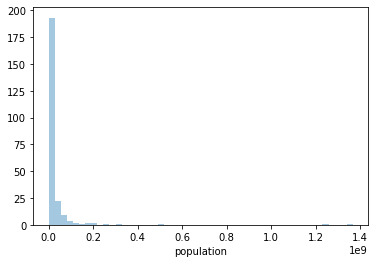

In [11]:
sns.distplot(x.population,kde=False)

<AxesSubplot:xlabel='population_growth'>

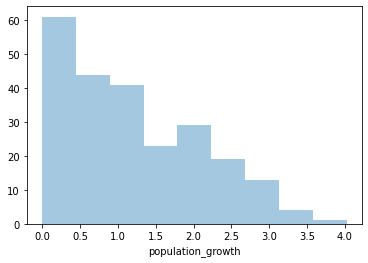

In [19]:
sns.distplot(x.population_growth,kde=False)

<AxesSubplot:xlabel='birth_rate'>

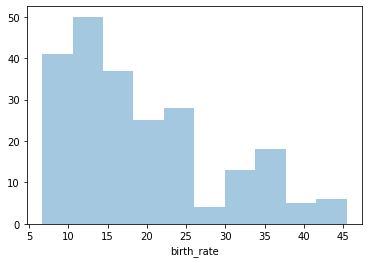

In [13]:
sns.distplot(x.birth_rate,kde=False)

<AxesSubplot:xlabel='death_rate'>

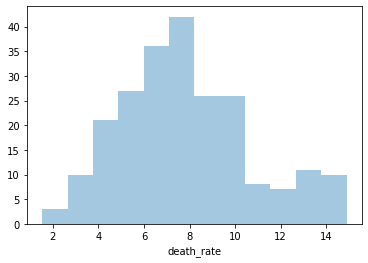

In [14]:
sns.distplot(x.death_rate,kde=False)

<AxesSubplot:xlabel='population', ylabel='Density'>

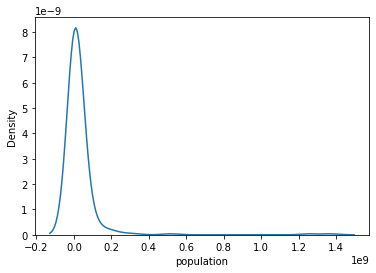

In [15]:
sns.kdeplot(x.population)

In [16]:
q = '''SELECT name, CAST(population as float)/CAST(area as float) density
FROM facts
ORDER BY density DESC
LIMIT 15;'''
p=pd.read_sql_query(q, c)

In [17]:
p

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


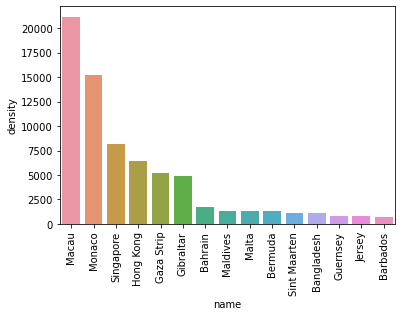

In [18]:
sns.barplot(p.name,p.density)
a=plt.xticks(rotation=90)

In [24]:
%%sql
SELECT id,code,name,population,migration_rate FROM facts ORDER BY migration_rate DESC LIMIT 15

 * sqlite:///factbook.db
Done.


id,code,name,population,migration_rate
141,qa,Qatar,2194817,22.39
242,aq,American Samoa,54343,21.13
115,fm,"Micronesia, Federated States of",105216,20.93
170,sy,Syria,17064854,19.79
176,tn,Tonga,106501,17.84
229,vi,British Virgin Islands,33454,17.28
103,lu,Luxembourg,570252,17.16
230,cj,Cayman Islands,56092,14.4
156,sn,Singapore,5674472,14.05
123,nr,Nauru,9540,13.63


In [25]:
%%sql
SELECT code,name,population,area_land FROM facts ORDER BY area_land DESC LIMIT 15

 * sqlite:///factbook.db
Done.


code,name,population,area_land
rs,Russia,142423773,16377742
ch,China,1367485388,9326410
us,United States,321368864,9161966
ca,Canada,35099836,9093507
br,Brazil,204259812,8358140
as,Australia,22751014,7682300
in,India,1251695584,2973193
ar,Argentina,43431886,2736690
kz,Kazakhstan,18157122,2699700
ag,Algeria,39542166,2381741
